In [1]:
# Import packages, load Genius API token from local .env file
import os
import requests
import json
import pandas as pd
%load_ext dotenv
%dotenv

In [2]:
# Set parameters to call API
genius_token=os.getenv("GENIUS_TOKEN")
base_url = "http://api.genius.com"
value = 'Bearer ' + genius_token
headers= {'Authorization': value}

In [3]:
search_url = base_url + "/search"
artist_name = "Taylor Swift"
params = {'q': artist_name}
response = requests.get(search_url, params = params, headers=headers)
response_data = response.json()
response_data

{'meta': {'status': 200},
 'response': {'hits': [{'highlights': [],
    'index': 'song',
    'type': 'song',
    'result': {'annotation_count': 13,
     'api_path': '/songs/3210592',
     'full_title': 'Look What You Made Me Do by\xa0Taylor\xa0Swift',
     'header_image_thumbnail_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.300x300x1.jpg',
     'header_image_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.699x699x1.jpg',
     'id': 3210592,
     'lyrics_owner_id': 2171344,
     'lyrics_state': 'complete',
     'path': '/Taylor-swift-look-what-you-made-me-do-lyrics',
     'pyongs_count': 182,
     'song_art_image_thumbnail_url': 'https://images.genius.com/bcd1ae9927c14b71b487d00cb4fa1b8c.300x300x1.png',
     'stats': {'hot': False,
      'unreviewed_annotations': 0,
      'concurrents': 3,
      'pageviews': 1442333},
     'title': 'Look What You Made Me Do',
     'title_with_featured': 'Look What You Made Me Do',
     'url': 'https://genius.com/Ta

This would be similar to typing in "Taylor Swift" into the search bar on Genius. What's the top hit that shows up? 

In [4]:
response_data['response']['hits'][0]

{'highlights': [],
 'index': 'song',
 'type': 'song',
 'result': {'annotation_count': 13,
  'api_path': '/songs/3210592',
  'full_title': 'Look What You Made Me Do by\xa0Taylor\xa0Swift',
  'header_image_thumbnail_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.300x300x1.jpg',
  'header_image_url': 'https://images.genius.com/4303d8c0fc0321cc9c7e591ac30722b4.699x699x1.jpg',
  'id': 3210592,
  'lyrics_owner_id': 2171344,
  'lyrics_state': 'complete',
  'path': '/Taylor-swift-look-what-you-made-me-do-lyrics',
  'pyongs_count': 182,
  'song_art_image_thumbnail_url': 'https://images.genius.com/bcd1ae9927c14b71b487d00cb4fa1b8c.300x300x1.png',
  'stats': {'hot': False,
   'unreviewed_annotations': 0,
   'concurrents': 3,
   'pageviews': 1442333},
  'title': 'Look What You Made Me Do',
  'title_with_featured': 'Look What You Made Me Do',
  'url': 'https://genius.com/Taylor-swift-look-what-you-made-me-do-lyrics',
  'primary_artist': {'api_path': '/artists/1177',
   'header_ima

Looks like it's "Look What You Made Me Do". Assuming the top hit will show the correct artist (which, in this case, is a good assumption), grab the artist ID from this top hit so we can get all of Taylor Swift's songs. 

In [5]:
taylor_swift_id = response_data['response']['hits'][0]['result']['primary_artist']['id']
artist_songs_url = base_url + '/artists/' + str(taylor_swift_id) + '/songs'
params={'sort': 'title',
       'per_page': 50} # results per page can only be a max of 50
response = requests.get(artist_songs_url, params = params, headers=headers)
response.json()

{'meta': {'status': 200},
 'response': {'songs': [{'annotation_count': 6,
    'api_path': '/songs/2432258',
    'full_title': '1989 [Booklet] by\xa0Taylor\xa0Swift',
    'header_image_thumbnail_url': 'https://images.genius.com/b5188eb016e3ad3563d387d0e602913e.300x300x1.jpg',
    'header_image_url': 'https://images.genius.com/b5188eb016e3ad3563d387d0e602913e.1000x1000x1.jpg',
    'id': 2432258,
    'lyrics_owner_id': 1448826,
    'lyrics_state': 'complete',
    'path': '/Taylor-swift-1989-booklet-annotated',
    'pyongs_count': 2,
    'song_art_image_thumbnail_url': 'https://images.genius.com/b5188eb016e3ad3563d387d0e602913e.300x300x1.jpg',
    'stats': {'hot': False, 'unreviewed_annotations': 0, 'pageviews': 10124},
    'title': '1989 [Booklet]',
    'title_with_featured': '1989 [Booklet]',
    'url': 'https://genius.com/Taylor-swift-1989-booklet-annotated',
    'primary_artist': {'api_path': '/artists/1177',
     'header_image_url': 'https://images.genius.com/5923e08c0f81c547dae983ebb

Taylor Swift has a ton of songs (more than 50), so need to create a loop to go through all the pages. We'll know we got to the last page if 'next_page' = None in the JSON blob

In [6]:
# album = 'reputation'
song_title = []
song_url = []
page = 1
next_page = 1
while next_page != None:
    params={'sort': 'title',
            'per_page': 50,
            'page': page} 
    response = requests.get(artist_songs_url, params=params, headers=headers)
    response_data = response.json()
    next_page=response_data['response']['next_page']
    page += 1 # Will keep going until there aren't any more pages
    for i in response_data['response']['songs']:
        if i['primary_artist']['id'] == taylor_swift_id: # Only include songs by Taylor Swift
            print(i['title'] + " " + i['url'])

1989 [Booklet] https://genius.com/Taylor-swift-1989-booklet-annotated
1989 Interview with Paul McGuire https://genius.com/Taylor-swift-1989-interview-with-paul-mcguire-annotated
1989 [Liner Notes] https://genius.com/Taylor-swift-1989-liner-notes-annotated
1989 Tour Setlist https://genius.com/Taylor-swift-1989-tour-setlist-lyrics
1989 [Tracklist + Album Art] https://genius.com/Taylor-swift-1989-tracklist-album-art-annotated
1989 World Tour Dates https://genius.com/Taylor-swift-1989-world-tour-dates-annotated
22 https://genius.com/Taylor-swift-22-lyrics
Acting Like a Boy* https://genius.com/Taylor-swift-acting-like-a-boy-lyrics
Ain't Nothing 'Bout You https://genius.com/Taylor-swift-aint-nothing-bout-you-lyrics
Album of the Year Acceptance Speech (Grammys 2016) https://genius.com/Taylor-swift-album-of-the-year-acceptance-speech-grammys-2016-annotated
All Night Diner https://genius.com/Taylor-swift-all-night-diner-lyrics
All Too Well https://genius.com/Taylor-swift-all-too-well-lyrics
All

In The Pouring Rain https://genius.com/Taylor-swift-in-the-pouring-rain-lyrics
Invisible https://genius.com/Taylor-swift-invisible-lyrics
Irreplaceable https://genius.com/Taylor-swift-irreplaceable-lyrics
I Used To Fly https://genius.com/Taylor-swift-i-used-to-fly-lyrics
I Want You Back https://genius.com/Taylor-swift-i-want-you-back-lyrics
I Want You Back (Live 2011) https://genius.com/Taylor-swift-i-want-you-back-live-2011-lyrics
I Wished On A Plane https://genius.com/Taylor-swift-i-wished-on-a-plane-lyrics
I Wish You Would https://genius.com/Taylor-swift-i-wish-you-would-lyrics
I Wish You Would (Voice Memo) https://genius.com/Taylor-swift-i-wish-you-would-voice-memo-lyrics
Jump Then Fall https://genius.com/Taylor-swift-jump-then-fall-lyrics
Just A Dream https://genius.com/Taylor-swift-just-a-dream-lyrics
Just South of Knowing Why https://genius.com/Taylor-swift-just-south-of-knowing-why-lyrics
King Of My Heart https://genius.com/Taylor-swift-king-of-my-heart-lyrics
Last Christmas ht

The Power of Pop https://genius.com/Taylor-swift-the-power-of-pop-annotated
There's Your Trouble https://genius.com/Taylor-swift-theres-your-trouble-lyrics
The Story of Us https://genius.com/Taylor-swift-the-story-of-us-lyrics
The Sweet Escape https://genius.com/Taylor-swift-the-sweet-escape-lyrics
The Trick to Holding On [Poem] https://genius.com/Taylor-swift-the-trick-to-holding-on-poem-annotated
The Way I Loved You https://genius.com/Taylor-swift-the-way-i-loved-you-lyrics
Thinkin' 'Bout You https://genius.com/Taylor-swift-thinkin-bout-you-lyrics
Thirteen Blocks (Can't Call It Love) https://genius.com/Taylor-swift-thirteen-blocks-cant-call-it-love-lyrics
This Here Guitar https://genius.com/Taylor-swift-this-here-guitar-lyrics
This Is Really Happening https://genius.com/Taylor-swift-this-is-really-happening-lyrics
This Is What You Came For https://genius.com/Taylor-swift-this-is-what-you-came-for-lyrics
This Is Why We Can't Have Nice Things https://genius.com/Taylor-swift-this-is-why

She has SO MANY things that show up through the Genius API (covers / interviews / setlists / IG posts / etc). Trying to figure out how to narrow down the list to just those on her 6 albums, but there isn't anything in the metadata that has album name for each of these songs. One way is to scrape the lyrics page for every single record that shows up above, but that will take forever, and still might not give good results because she performs a lot of covers on tour. 

Maybe we can use the Spotify API to get a list of the tracks on an album, and all we would have to input is the album names we care about? 

# Spotify

In [7]:
import sys
import spotipy
import spotipy.util as util
import spotipy.oauth2 as oauth2
from IPython.display import display


spotify_client_id = os.getenv("SPOTIFY_CLIENT_ID")
spotify_secret_id = os.getenv("SPOTIFY_CLIENT_SECRET")

client_credentials=oauth2.SpotifyClientCredentials(client_id=spotify_client_id,client_secret=spotify_secret_id)
sp = spotipy.Spotify(client_credentials_manager=client_credentials)

In [8]:
selected_albums = ['1989','reputation','Fearless','Taylor Swift','Red','Speak Now','ME!']

def get_artist(name):
    results = sp.search(q='artist:' + name, type='artist')
    items = results['artists']['items']
    if len(items) > 0:
        return items[0]
    else:
        return None
    
def show_album_tracks(album,album_dictionary,track_dictionary):
    tracks = []
    results = sp.album_tracks(album['id'])
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
#     print(album['name'] + " " + str(tracks))
    for track in tracks:
        track_dictionary[track['uri']] = track['name'] 
        if album['name'] in album_dictionary:
            album_dictionary[album['name']].append(track['uri'])
        else:
            album_dictionary[album['name']] = [track['uri']]
    return album_dictionary, track_dictionary
        
def show_artist_albums(id):
    albums = []
    album_dictionary = {}
    track_dictionary = {}
    results = sp.artist_albums(artist['id'], album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    unique = set()  # skip duplicate albums
    for album in albums:
        name = album['name']
        print(name)
        if not name in unique and name in selected_albums:  
            unique.add(name)
            album_dictionary[name] = []
            show_album_tracks(album,album_dictionary,track_dictionary)
    return album_dictionary, track_dictionary



In [9]:
name = "Taylor Swift"
artist = get_artist(name)
# show_artist(artist)
album_track_dict,track_dict = show_artist_albums(artist)
album_track_dict

reputation
reputation Stadium Tour Surprise Song Playlist
reputation (Big Machine Radio Release Special)
Taylor Swift Karaoke: 1989 (Deluxe)
1989
1989
Taylor Swift Karaoke: 1989 (Deluxe Edition)
Taylor Swift Karaoke: 1989 (Deluxe)
Taylor Swift Karaoke: 1989
1989 (Deluxe)
1989 (Deluxe Edition)
1989 (Deluxe Edition)
1989 (Big Machine Radio Release Special)
1989
1989 (Deluxe)
Red (Deluxe Edition)
Red (Deluxe Edition)
Red
Red (Karaoke Version)
Red
Taylor Swift Karaoke: Red
Red (Big Machine Radio Release Special)
Speak Now (Deluxe Edition)
Speak Now
Speak Now (US Version)
Speak Now (Karaoke Version)
Taylor Swift Karaoke: Speak Now
Speak Now (Japanese Version)
Speak Now World Tour Live
Speak Now (Big Machine Radio Release Special)
Speak Now
Speak Now (Deluxe Package)
Fearless
Fearless
Fearless (International Version)
Fearless
Fearless (Karaoke Version)
Fearless Karaoke
Fearless (Platinum Edition)
Fearless Platinum Edition
Fearless (Big Machine Radio Release Special)
Fearless
Taylor Swift
Tay

{'reputation': ['spotify:track:2yLa0QULdQr0qAIvVwN6B5',
  'spotify:track:2x0WlnmfG39ZuDmstl9xfX',
  'spotify:track:4svZDCRz4cJoneBpjpx8DJ',
  'spotify:track:1R0a2iXumgCiFb7HEZ7gUE',
  'spotify:track:6NFyWDv5CjfwuzoCkw47Xf',
  'spotify:track:1P17dC1amhFzptugyAO7Il',
  'spotify:track:5PxFv9yJEg9dxvbZggykro',
  'spotify:track:1ZY1PqizIl78geGM4xWlEA',
  'spotify:track:0VE4kBnHJUgtMf0dy6DRmW',
  'spotify:track:7HuBDWi18s4aJM8UFnNheH',
  'spotify:track:7I7JbDv63ZJJsSi24DyJrz',
  'spotify:track:6oVxXO5oQ4pTpO8RSnkzvv',
  'spotify:track:07NxDD1iKCHbAldceD7QLP',
  'spotify:track:1GwMQaZz6Au3QLDbjbMdme',
  'spotify:track:7F5oktn5YOsR9eR5YsFtqb'],
 '1989': ['spotify:track:6qnM0XXPZOINWA778uNqQ9',
  'spotify:track:1p80LdxRV74UKvL8gnD7ky',
  'spotify:track:4lIxdJw6W3Fg4vUIYCB0S5',
  'spotify:track:5OndtwLGA9O6XHFcGm2H7r',
  'spotify:track:0dAb8TY433dl3ZfXYCLE19',
  'spotify:track:5xTtaWoae3wi06K5WfVUUH',
  'spotify:track:3wmN11qXGL0HyPojvEE1D9',
  'spotify:track:273dCMFseLcVsoSWx59IoE',
  'spotify:

In [10]:
album_track_dict['ME!'] = ['spotify:track:4Sib57MmYGJzSvkW84jTwh']
track_dict['spotify:track:4Sib57MmYGJzSvkW84jTwh'] = 'ME!'

album_df = pd.DataFrame.from_dict(album_track_dict, orient = 'index')
track_df = pd.DataFrame.from_dict(track_dict, orient = 'index',columns = ['track_name'])
album_track_df = album_df.stack().reset_index(level = 1, drop = True).to_frame(name = 'track_uri')


In [11]:
track_features_list = []
for k,v in album_track_dict.items():
    for i in v:
        track_features_list.append(sp.audio_features(i)[0])


In [12]:
index_num = 0

while index_num <= (len(track_features_list) - 1):
    if index_num == 0:
        df = pd.DataFrame(track_features_list[index_num],index = [track_features_list[index_num]['uri']])
    else:
        df = df.append(pd.DataFrame(track_features_list[index_num],index = [track_features_list[index_num]['uri']]))
    index_num += 1


In [13]:
overall_df = pd.merge(album_track_df, track_df, how = 'inner', right_index=True, left_on='track_uri')
overall_df = pd.merge(overall_df, df, how='left', left_on='track_uri', right_index=True).reset_index()

# x = 'energy'
# row_number = 3
# display(overall_df.sort_values([x]).head(row_number))
# display(overall_df.sort_values([x]).tail(row_number))

In [14]:
overall_df.columns = ['album', 'track_uri', 'track_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature']

In [15]:
album_year = {'Taylor Swift': 2006, 'Fearless': 2008, 'Speak Now': 2010, 'Red': 2012, '1989': 2014, 'reputation': 2017, 'ME!': 2019}
album_year_df = pd.DataFrame(pd.DataFrame(album_year,index=[0]).unstack()).droplevel(level=1)
album_year_df.columns = ['year']
album_year_df

,year
Taylor Swift,2006
Fearless,2008
Speak Now,2010
Red,2012
1989,2014
reputation,2017
ME!,2019


In [16]:
overall_df = pd.merge(overall_df, album_year_df, left_on = 'album', right_index=True)
mean_df = overall_df.groupby('album').mean().reset_index()
mean_df

,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,1989,0.650231,0.698769,4.692308,-6.236462,1.000000,0.066254,0.113175,0.000906,0.154577,0.461908,118.552462,225220.461538,4.000000,2014.0
1,Fearless,0.578300,0.675850,5.100000,-4.923150,0.950000,0.033890,0.134622,0.000362,0.168200,0.421600,122.190800,231020.650000,4.000000,2008.0
2,ME!,0.715000,0.832000,0.000000,-4.080000,1.000000,0.050200,0.032400,0.000000,0.112000,0.660000,91.006000,193040.000000,4.000000,2019.0
3,Red,0.618813,0.622688,4.687500,-7.105750,0.937500,0.040394,0.114850,0.002476,0.135113,0.492687,114.487125,243462.375000,3.937500,2012.0
4,Speak Now,0.544929,0.663286,5.500000,-4.632143,0.857143,0.037586,0.189888,0.000065,0.165071,0.420286,138.864857,287283.857143,3.714286,2010.0
5,Taylor Swift,0.534600,0.666533,5.533333,-4.609600,0.933333,0.033333,0.188015,0.000034,0.165160,0.449267,130.998000,213970.733333,4.000000,2006.0
6,reputation,0.657933,0.582867,3.733333,-7.672400,0.666667,0.095120,0.138515,0.000044,0.152153,0.293400,127.540133,223020.466667,4.000000,2017.0


In [40]:
mean_df.sort_values(by=['year'],inplace = True)
mean_df = mean_df.reset_index(drop=True)
mean_df

,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,Taylor Swift,0.534600,0.666533,5.533333,-4.609600,0.933333,0.033333,0.188015,0.000034,0.165160,0.449267,130.998000,213970.733333,4.000000,2006.0
1,Fearless,0.578300,0.675850,5.100000,-4.923150,0.950000,0.033890,0.134622,0.000362,0.168200,0.421600,122.190800,231020.650000,4.000000,2008.0
2,Speak Now,0.544929,0.663286,5.500000,-4.632143,0.857143,0.037586,0.189888,0.000065,0.165071,0.420286,138.864857,287283.857143,3.714286,2010.0
3,Red,0.618813,0.622688,4.687500,-7.105750,0.937500,0.040394,0.114850,0.002476,0.135113,0.492687,114.487125,243462.375000,3.937500,2012.0
4,1989,0.650231,0.698769,4.692308,-6.236462,1.000000,0.066254,0.113175,0.000906,0.154577,0.461908,118.552462,225220.461538,4.000000,2014.0
5,reputation,0.657933,0.582867,3.733333,-7.672400,0.666667,0.095120,0.138515,0.000044,0.152153,0.293400,127.540133,223020.466667,4.000000,2017.0
6,ME!,0.715000,0.832000,0.000000,-4.080000,1.000000,0.050200,0.032400,0.000000,0.112000,0.660000,91.006000,193040.000000,4.000000,2019.0


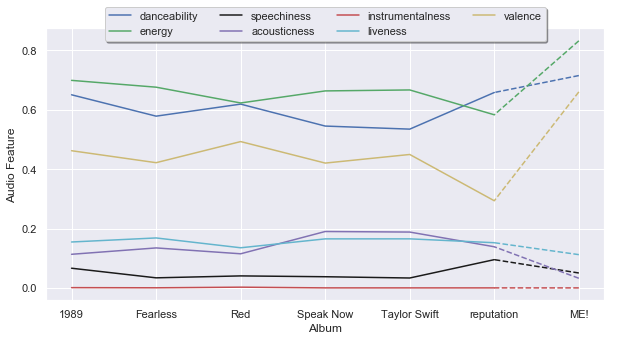

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
plot_lines = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
color_dict = {'danceability': 'b', 'energy': 'g', 'acousticness': 'm', 'instrumentalness': 'r', 'liveness': 'c', 'valence': 'y', 'speechiness': 'k'}
# plot_lines = ['danceability']
plt.figure(figsize=(10,5))
line_num = 1
for i in plot_lines:
#     sns.lineplot(x=mean_df['album'], y=mean_df[i], label= i)
    actual_df = mean_df.iloc[:-1,:]
    predicted_df = mean_df.iloc[-2:,:]
    ax = sns.lineplot(x=actual_df['album'], y=actual_df[i], label= i, color=color_dict[i])
    sns.lineplot(x=predicted_df['album'], y=predicted_df[i], ax=ax, color=color_dict[i])
    ax.lines[line_num].set_linestyle("--")
    line_num += 2
#     plt.show()
plt.legend(loc='upper center',fancybox=True,ncol=4,shadow=True,bbox_to_anchor = (0.5,1.1))
plt.xlabel('Album')
plt.ylabel('Audio Feature')
plt.show()


In [19]:
name = "Taylor Swift"
artist = get_artist(name)
# show_artist(artist)
# album_track_dict,track_dict = show_artist_albums(artist)
# album_track_dict

In [20]:
me_uri = 'spotify:track:4Sib57MmYGJzSvkW84jTwh'
me_df = pd.DataFrame(sp.audio_features(me_uri))
me_df['album'] = 'ME!'
me_df['year'] = 2019

In [21]:
me_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,album,year
0,0.0324,https://api.spotify.com/v1/audio-analysis/4Sib...,0.715,193040,0.832,4Sib57MmYGJzSvkW84jTwh,0,0,0.112,-4.08,1,0.0502,91.006,4,https://api.spotify.com/v1/tracks/4Sib57MmYGJz...,audio_features,spotify:track:4Sib57MmYGJzSvkW84jTwh,0.66,ME!,2019
